In [1]:
import numpy as np

test_id = 2
sample_inputs = [
    "[BOS] 1 -2 3 0 -1 2 -3 0 2 4 -1 0 1 -3 4 0 -2 -3 -4 0 3 -4 -1 0 -2 4 -1 0 [SEP] D 1 [UP] D 1 D 2 [UP] D 1 D 2 4 -3 [BT] D 1 -2 -3 4 [BT] -1 D 2 [UP] -1 D 2 3 4 [BT] -1 -2 D 3 [UP] -1 -2 D 3 4 SAT",
    "[BOS] 6 -7 -5 0 -4 -8 9 0 -1 -8 2 0 -3 6 1 0 5 -9 -10 0 -7 -1 9 0 -4 -6 10 0 -4 -8 7 0 -7 -2 -8 0 3 6 1 0 8 1 3 0 6 3 7 0 3 9 7 0 3 -9 -5 0 -1 3 2 0 5 3 -6 0 -10 7 4 0 8 -9 -10 0 1 -4 5 0 -2 10 7 0 -10 5 -2 0 -8 10 -7 0 -4 -5 -1 0 -10 -7 6 0 10 7 -1 0 -3 -6 7 0 4 6 -9 0 -9 -10 7 0 -7 -10 8 0 5 4 -2 0 -1 -3 4 0 -3 -8 1 0 7 9 10 0 4 3 2 0 10 2 3 0 9 -4 8 0 9 5 2 0 1 -2 -8 0 8 9 -1 0 1 -10 4 0 5 2 -1 0 [SEP] D 7 [UP] D 7 D 1 [UP] D 7 D 1 9 D 6 [UP] D 7 D 1 9 D 6 D 5 [UP] D 7 D 1 9 D 6 D 5 3 -4 [BT] D 7 D 1 9 D 6 -5 -10 -4 3 [BT] D 7 D 1 9 -6 -5 -10 -8 4 2 SAT",
    "[BOS] 6 -8 10 0 2 -6 -7 0 8 -7 3 0 -3 1 -2 0 -2 -10 4 0 1 -6 -2 0 -8 4 -9 0 1 10 -5 0 8 4 5 0 -7 -6 -4 0 6 3 10 0 1 7 -10 0 1 6 -3 0 7 10 -9 0 -2 1 4 0 -7 -9 4 0 9 6 -3 0 4 -2 -9 0 3 8 -1 0 -1 5 -3 0 -2 -3 -7 0 4 -2 8 0 -6 -9 -10 0 4 5 10 0 -7 3 -2 0 -6 7 4 0 -8 -1 -10 0 -7 8 10 0 -9 -7 -1 0 -6 -2 5 0 -6 5 -3 0 -6 -4 9 0 9 -10 7 0 8 -3 -7 0 7 -10 -5 0 1 2 -4 0 4 -8 3 0 8 -3 6 0 -8 -2 1 0 6 -3 -10 0 -1 -6 -2 0 6 -4 2 0 10 3 6 0 [SEP] D 8 [UP] D 8 D -4 [UP] D 8 D -4 -9 3 6 7 2 [BT] D 8 4 D -6 [UP] D 8 4 D -6 10 -1 7 -3 -2 [BT] D 8 4 6 -7 9 10 [BT] -8 D 2 [UP] -8 D 2 4 D -7 [UP] -8 D 2 4 D -7 D -5 [UP] -8 D 2 4 D -7 D -5 -6 -3 10 1 [BT] -8 D 2 4 D -7 5 -10 1 -9 3 6 [BT] -8 D 2 4 7 3 [BT] -8 -2 D 3 [UP] -8 -2 D 3 -7 6 4 5 9 10 [BT] -8 -2 -3 -7 -1 -10 -5 4 UNSAT"
]
# sample_input_unsat = "[BOS] 1 -2 3 0 -1 2 -3 0 2 4 -1 0 1 -3 4 0 -2 -3 -4 0 3 -4 -1 0 -2 4 -1 0 1 2 -3 0 1 2 3 0 [SEP]"
sample_input = sample_inputs[test_id]
prompt_str = sample_input.split("[SEP]")[0] + "[SEP]"
trace_str = sample_input.split("[SEP]")[1].strip()
prompt_tokens = prompt_str.split()
trace_tokens = trace_str.split()
full_trace_tokens = prompt_tokens + trace_tokens

M=10

context_len = len(full_trace_tokens) + 10
num_vars = max(int(tok) for tok in full_trace_tokens if tok.isdigit())
num_clauses = prompt_str.count("0") + 2
token_set = np.array([str(i) for i in range(1, num_vars+1)] + [str(-i) for i in range(1, num_vars+1)] + ['0', '[SEP]',  '[UP]', '[BT]', '[BOS]', 'D', 'SAT', 'UNSAT'])
print(token_set)
token_to_idx = {token: idx for idx, token in enumerate(token_set)}


['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '-1' '-2' '-3' '-4' '-5' '-6'
 '-7' '-8' '-9' '-10' '0' '[SEP]' '[UP]' '[BT]' '[BOS]' 'D' 'SAT' 'UNSAT']


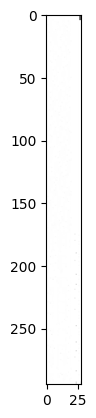

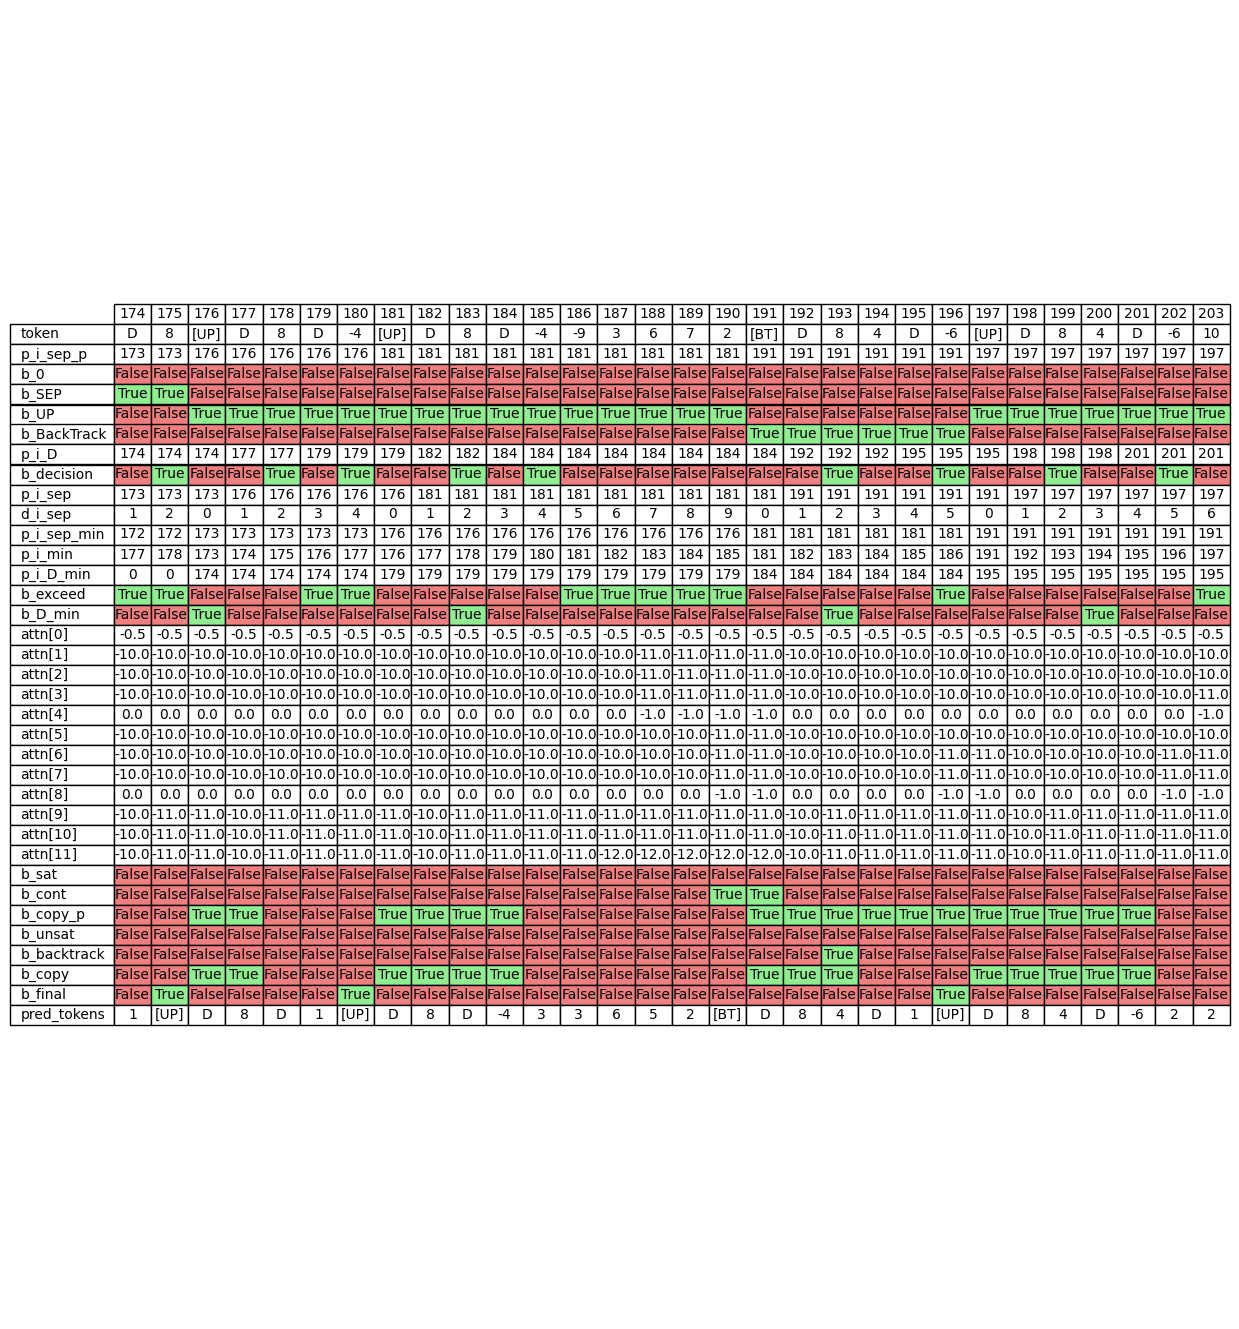

'UNSAT'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from visualization import Visualization

def encode_tokens(tokens):
    return np.eye(len(token_set))[np.array([token_to_idx[token] for token in tokens])]

def e(token):
    return np.eye(len(token_set))[token_to_idx[token]]

def nearst_token(tokens, targets):
    ret = []
    last_sep = 0
    for i in range(len(tokens)):
        if tokens[i] in targets:
            last_sep = i
        ret.append(last_sep)
    return np.array(ret)

def simulated_self_attention(Q, K, V):
    attention_logits = np.dot(Q, K.T)
    mask = np.tril(np.ones(attention_logits.shape), k=0)
    attention_logits = np.where(mask == 0, -1e9, attention_logits)
    max_attention_logits = np.max(attention_logits, axis=-1)
    max_attention_positions = np.isclose(attention_logits, max_attention_logits[:, None])
    selected_V = np.where(max_attention_positions[:, :, None], V[None, :, :], 0)
    avg_V = np.sum(selected_V, axis=1) / np.sum(max_attention_positions, axis=1, keepdims=True)
    return avg_V

def T_transform(encodings, true_vec=(1, 0), false_vec=(0, 1), none_vec=(0, 0)):
    mat = np.zeros((2 * num_vars, 2 * num_vars))
    true_vec_off = (true_vec[0] - none_vec[0], true_vec[1] - none_vec[1])
    false_vec_off = (false_vec[0] - none_vec[0], false_vec[1] - none_vec[1])
    for i in range(num_vars):
        true_id = i
        false_id = num_vars + i
        mat[true_id, true_id] = true_vec_off[0]
        mat[true_id, false_id] = true_vec_off[1]
        mat[false_id, true_id] = false_vec_off[0]
        mat[false_id, false_id] = false_vec_off[1]

    res = encodings @ mat
    res[:, :num_vars] += none_vec[0]
    res[:, num_vars:] += none_vec[1]
    return res


def predict_next_token_abstract(tokens, visualize=False):
    # Layer 1
    tokens = np.array(tokens)
    encoding = encode_tokens(tokens)
    viz = Visualization()
    viz.add_array('token', tokens)

    p_i_sep_p = nearst_token(tokens, ['0', '[SEP]', '[UP]', '[BT]'])
    viz.add_array('p_i_sep_p', p_i_sep_p)

    b_0 = tokens[p_i_sep_p] == '0'
    b_SEP = tokens[p_i_sep_p] == '[SEP]'
    b_UP = tokens[p_i_sep_p] == '[UP]'
    b_BackTrack = tokens[p_i_sep_p] == '[BT]'
    viz.add_array('b_0', b_0)
    viz.add_array('b_SEP', b_SEP)
    viz.add_array('b_UP', b_UP)
    viz.add_array('b_BackTrack', b_BackTrack)
    p_i_D = np.array(nearst_token(tokens, ['D']))
    viz.add_array('p_i_D', p_i_D)
    # Layer 2
    p_i_sep = np.insert(p_i_sep_p[:-1], 0, 0).astype(int)
    p_i_sep[0] = p_i_sep[0] - 1
    b_decision = np.array([False] + [token == 'D' for token in tokens][:-1])
    viz.add_array('b_decision', b_decision)
    # MODIFICATION: np.arange(len(tokens)) - p_i_sep => p_i_sep_p
    d_i_sep = np.arange(len(tokens)) - p_i_sep_p
    viz.add_array('p_i_sep', p_i_sep)
    viz.add_array('d_i_sep', d_i_sep)
    viz.add_array('b_decision', b_decision)
    # Layer 3
    r_i = np.array([np.array(encoding[p_i_sep[i]+1:i+1,:]).sum(axis=0) for i in range(len(tokens))])[:,:2*num_vars]
    #viz.add_array('r_i', r_i)
    # Modification: p_i_sep[p_i_sep] => p_i_sep[p_i_sep_p]
    p_i_sep_min = p_i_sep[p_i_sep_p]
    viz.add_array('p_i_sep_min', p_i_sep_min)
    # MODIFICATION: Add M instead of i
    p_i_min = p_i_sep_min + d_i_sep + 4 * b_SEP
    viz.add_array('p_i_min', p_i_min)

    p_i_D_min = p_i_D[p_i_sep_p]
    viz.add_array('p_i_D_min', p_i_D_min)
    # MODIFICATION: p_i_D_min + 1
    b_exceed = p_i_min > (p_i_D_min + 1)
    viz.add_array('b_exceed', b_exceed)
    b_D_min = (p_i_D_min == p_i_min + 1)
    viz.add_array('b_D_min', b_D_min)
    # viz.add_array('b_BT_finish', b_BT_finish)
    # Layer 4
    sat_Q = np.hstack((r_i, np.ones((r_i.shape[0], 1))))
    sat_K_offset = np.zeros((r_i.shape[0], 1))
    sat_K_offset[np.array(tokens) != '0'] = -M
    sat_K_offset[0][0] = -0.5
    sat_K = np.hstack((-r_i, sat_K_offset))
    sat_V = np.zeros((r_i.shape[0], 1))
    sat_V[0][0] = 1
    viz.add_array('attn', (sat_Q @ sat_K.T)[:, :12])
    b_sat = simulated_self_attention(sat_Q, sat_K, sat_V).flatten().astype(bool)
    viz.add_array('b_sat', b_sat)

    unsat_Q = np.hstack((T_transform(r_i, true_vec=(1, 0), false_vec=(0, 1), none_vec=(1, 1)), np.ones((r_i.shape[0], 1))))
    unsat_K = sat_K
    unsat_V = np.ones((r_i.shape[0], 1))
    unsat_V[0][0] = 0
    b_cont = simulated_self_attention(unsat_Q, unsat_K, unsat_V).flatten().astype(bool)
    viz.add_array('b_cont', b_cont)
    # MODIFICATION: p_i_sep*_p* - 1
    b_copy_p = p_i_min < (p_i_sep_p - 1)
    viz.add_array('b_copy_p', b_copy_p)

    up_q = np.hstack((T_transform(r_i, true_vec=(0, 1), false_vec=(1, 0), none_vec=(0, 0)), np.ones((r_i.shape[0], 1))))
    up_k_offset = np.zeros((r_i.shape[0], 1))
    up_k_offset[np.array(tokens) != '0'] = -M
    up_k_offset[0][0] = 1.5
    up_k = np.hstack((r_i, up_k_offset))
    up_v = num_clauses * r_i
    o_up = simulated_self_attention(up_q, up_k, up_v)
    # Goal: (o_up > 0) and not T(r_i)=ReLU(ReLU(o_up) - ReLU(o_up - 1) - T(r_i))
    e_up = np.maximum(o_up - T_transform(r_i, true_vec=(1, 1), false_vec=(1, 1), none_vec=(0, 0)), 0) - np.maximum(o_up - 1, 0)
    b_final = np.logical_and(b_exceed, b_decision)
    b_no_decision = p_i_D <= p_i_sep
    # MODIFICATION: add b_BT_finish for exception
    b_BT_finish = (p_i_D_min <= p_i_min) & b_BackTrack
    # Layer 5
    e_BT = T_transform(encoding[p_i_D_min + 1][:, :2*num_vars], true_vec=(0, 1), false_vec=(1, 0), none_vec=(0, 0))
    # MODIFICATION: Get id 0 when p_i_min+1 does not exist
    p_i_min_index = p_i_min + 1
    # p_i_min_index[p_i_min_index >= len(tokens)] = 0
    # p_i_min_index = 
    e_copy = encoding[np.clip(p_i_min_index, 0, np.arange(len(p_i_min_index)))]
    b_unsat = np.logical_and(b_no_decision, b_cont)
    # MODICIATION: p_i_min == p_i_D_min - 1 -> b_D_min
    b_backtrack = b_D_min & b_BackTrack
    # MODIFICATION: b_copy moved to Layer 4 and renamed to b_copy_p
    # MODIFICATION: b_copy
    b_copy = b_copy_p & np.logical_not(b_BT_finish)
    # MODIFICATION: Add BT token condition
    b_BT_token = b_cont & np.logical_not(encoding[:, token_to_idx['[BT]']])

    viz.add_array('b_unsat', b_unsat)
    viz.add_array('b_backtrack', b_backtrack)
    viz.add_array('b_copy', b_copy)
    viz.add_array('b_final', b_final)

    output_logits = np.zeros_like(encoding)
    output_logits[b_sat, :] += 2 ** 8 * e('SAT')
    output_logits[b_unsat, :] += 2 ** 7 * e('UNSAT')
    output_logits[b_BT_token, :] += 2 ** 6 * e('[BT]')
    output_logits[b_final, :] += 2 ** 5 * e('[UP]')
    output_logits[b_backtrack, :2*num_vars] += 2 ** 4 * e_BT[b_backtrack, :]
    output_logits[b_copy, :] += 2 ** 3 * e_copy[b_copy, :]
    output_logits[:, :2*num_vars] += 2 ** 2 * e_up
    output_logits += 2 ** 1 * np.where((1 - encoding[:, token_to_idx['D']])[:, None], e('D'), 0)
    output_logits[:, :2*num_vars] += 2 ** 0 * T_transform(r_i, true_vec=(0, 0), false_vec=(0, 0), none_vec=(1, 1))
    
    plt.imshow(output_logits, cmap='Greys')

    max_idx = output_logits.argmax(axis=1)
    pred_tokens = token_set[max_idx]
    viz.add_array('pred_tokens', pred_tokens)
    if visualize:
      viz.display(start_index=len(prompt_tokens), max_len=30)

    return pred_tokens[-1]

predict_next_token_abstract(prompt_tokens + trace_tokens, visualize=True)

In [3]:
def generation(prompt_tokens):
  for _ in range(200):
    next_token = predict_next_token_abstract(prompt_tokens)
    prompt_tokens.append(next_token)
    if next_token in ['SAT', 'UNSAT']:
      break
  return prompt_tokens


In [4]:
print(' '.join(generation(sample_tokens.copy())))

NameError: name 'sample_tokens' is not defined

In [ ]:
print(' '.join(generation(unsat_tokens.copy())))